In [1]:
import random
from matplotlib import animation
import numpy as np
import osmnx as ox
import pandas as pd
from numpy import linalg as LA
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.stats import gaussian_kde

In [2]:
bbox = (47.383445, 47.374291, 8.539601, 8.554085)
area = ox.graph_from_bbox(bbox=bbox, network_type="drive")

In [3]:
# definine which buildings/roads to plot
buildings = ox.features_from_bbox(bbox=bbox, tags={"building": True})
roads = ox.features_from_bbox(
    bbox=bbox, tags={"highway": ["trunk", "primary", "secondary", "tertiary", "residential", "unclassified", "living_street"]})

node_df, edge_df = ox.graph_to_gdfs(area)

edge_df

osmid  oneway  \
u           v           key                                                     
26114485    30202173    0                                     4310926    True   
            300901455   0    [53275982, 69184467, 8143580, 580414174]    True   
26114487    26114488    0                                    35164367    True   
26114488    4133176776  0              [24477761, 136214058, 8139899]    True   
            300028688   0                       [595805217, 27410185]    True   
...                                                               ...     ...   
5538143413  5524043596  0                                   529381446   False   
10605667574 1588997012  0            [1189933179, 68429685, 13872879]   False   
            4324863936  0                                    68429685   False   
            10616659184 0                                  1139016462   False   
10616659184 10605667574 0                                  1139016462   False   

                              lanes  \
u           v           key           
26114485    30202173    0         2   
            300901455   0    [2, 1]   
26114487    26114488    0         3   
26114488    4133176776  0         2   
            300028688   0         1   
...                             ...   
5538143413  5524043596  0         4   
10605667574 1588997012  0       NaN   
            4324863936  0       NaN   
            10616659184 0       NaN   
10616659184 10605667574 0       NaN   

                                                                   name  \
u           v           key                                               
26114485    30202173    0                                   Bahnhofquai   
            300901455   0                  [Bahnhofbrücke, Bahnhofquai]   
26114487    26114488    0                                   Bahnhofquai   
26114488    4133176776  0    [Walchebrücke, Walchestrasse, Bahnhofquai]   
            300028688   0                                   Bahnhofquai   
...                                                                 ...   
5538143413  5524043596  0                           Stampfenbachstrasse   
10605667574 1588997012  0           [Huttenstrasse, Schmelzbergstrasse]   
            4324863936  0                                 Huttenstrasse   
            10616659184 0                            Schmelzbergstrasse   
10616659184 10605667574 0                            Schmelzbergstrasse   

                                 highway maxspeed reversed   length  \
u           v           key                                           
26114485    30202173    0       tertiary       50    False   21.442   
            300901455   0       tertiary       50    False  113.656   
26114487    26114488    0       tertiary       50    False   31.028   
26114488    4133176776  0       tertiary       50    False   82.492   
            300028688   0       tertiary       50    False   29.556   
...                                  ...      ...      ...      ...   
5538143413  5524043596  0       tertiary       50     True   92.589   
10605667574 1588997012  0    residential       30    False   74.968   
            4324863936  0    residential       30     True  259.561   
            10616659184 0    residential       30     True   10.566   
10616659184 10605667574 0    residential       30    False   10.566   

                                                                      geometry  \
u           v           key                                                      
26114485    30202173    0    LINESTRING (8.54186 47.37689, 8.54189 47.37694...   
            300901455   0    LINESTRING (8.54186 47.37689, 8.54208 47.37688...   
26114487    26114488    0      LINESTRING (8.54185 47.37805, 8.54170 47.37831)   
26114488    4133176776  0    LINESTRING (8.54170 47.37831, 8.54170 47.37836...   
            300028688   0    LINESTRING (8.54170 47.37831, 8.54161 47.37840...   
...                         

In [19]:
edge_df["lanes"] = edge_df["lanes"].fillna(1)
# some "lane" values are lists, pick the highest value
edge_df["lanes"] = edge_df["lanes"].apply(lambda x: max(x) if type(x) == list else x)

edge_df["lanes"] = edge_df["lanes"].astype(int)

5


<Axes: >

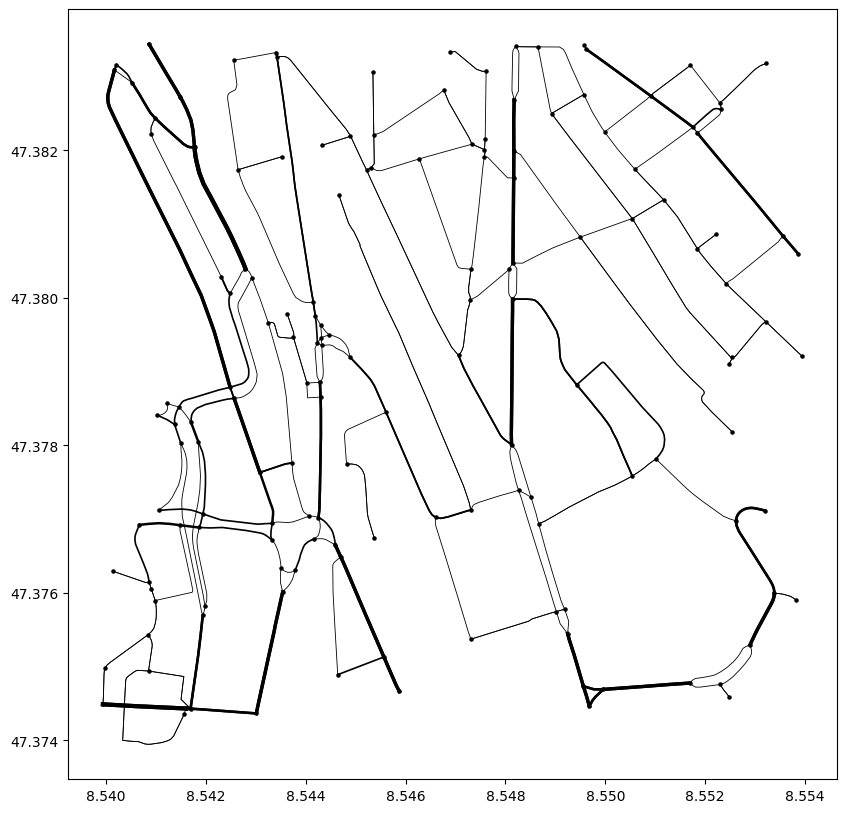

In [21]:
fig, ax = plt.subplots(figsize=(10, 10))

# set ax color to transparent
ax.patch.set_facecolor("none")
#buildings.plot(ax=ax, facecolor="silver", alpha=0.7)

max_lanes = edge_df["lanes"].max()
print(max_lanes)

# plot roads from edge_df["geometry"]
for i, row in edge_df.iterrows():
    x, y = row["geometry"].xy
    ax.plot(x, y, color="black", linewidth=row["lanes"] / max_lanes * 3)

# plot nodes from node_df["geometry"]
node_df.plot(ax=ax, markersize=5, color="black")
